# Capital One Data Challenge 
Analyzing New York Taxi Data

In [167]:
#Import the necessary packages
#Python version: 2.7.12
#numpy verison:1.11.1
#Pandas version: 0.18.1
#matplotlib version: 1.5.1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Question 1

1. Programmatically download and load into your favorite analytical tool the trip data for September 2015.
2. Report how many rows and columns of data you have loaded.

In [188]:
#import the Green Taxi data for Sept.2015
trip_data = pd.read_csv("green_tripdata_2015-09.csv", header=0, delimiter=",")
# take a peak
trip_data.head(5)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [168]:
print "# of rows: {0} \n# of columns: {1}".format(trip_data.shape[0], trip_data.shape[1])

# of rows: 1494926 
# of columns: 21


The data has 1494926 observations and 21 columns

## Question 2
1. Plot a histogram of the number of the trip distance ("Trip Distance").
2. Report any structure you find and any hypotheses you have about that structure.

count    1.494926e+06
mean     2.968141e+00
std      3.076621e+00
min      0.000000e+00
25%      1.100000e+00
50%      1.980000e+00
75%      3.740000e+00
98%      1.210000e+01
max      6.031000e+02
Name: Trip_distance, dtype: float64

# of trips > 50 miles:  10


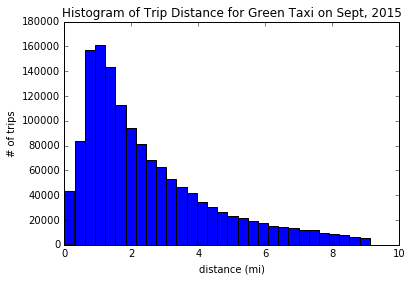

In [169]:
distance_data = trip_data["Trip_distance"]

#take a peak, looks like outliers are way out of normal range with 75 percentile 3.74 miles and max is 603 miles!
print distance_data.describe([.25, .5, .75, .98])

#only 68 trips are greater than 50 miles
print "\n# of trips > 50 miles: ", trip_data.ix[trip_data.Trip_distance > 100].shape[0]

#plot the histogram, upper-bounded by 2 standard deviation above mean
plt.figure()
plt.hist(distance_data,30,range=[0, distance_data.values.mean()+2*distance_data.values.std()],facecolor='blue')
plt.title("Histogram of Trip Distance for Green Taxi on Sept, 2015")
plt.xlabel('distance (mi)')
plt.ylabel('# of trips')
plt.show()

In [170]:
#the min is 0, there are 20952 of them
trip_data.ix[trip_data.Trip_distance == 0].shape[0]

20592

### To sum it up: 
The distance distribution is pretty right skewed with a long tail, just like some other 0-bounded variables such as income. log transformation might be needed for some analysis. Specifically, New Yorkers love grabbing cabs for short-distance traveling. 75% of trips are less than 4 miles. Outliers exist with extremely long-distance travel (>100 mi).

## Question 3
1. Report mean and median trip distance grouped by hour of day.
2. We'd like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fair, and any other interesting characteristics of these trips.

In [181]:
trip_data["hours"] = trip_data.lpep_pickup_datetime.apply(lambda x: pd.to_datetime(x, infer_datetime_format=False).hour)

In [182]:
hourly_data = trip_data[["Trip_distance","hours"]]
hourly_data.groupby("hours").agg(['mean', 'median'])

Trip_distance       
               mean median
hours                     
0          3.115276   2.20
1          3.017347   2.12
2          3.046176   2.14
3          3.212945   2.20
4          3.526555   2.36
5          4.133474   2.90
6          4.055149   2.84
7          3.284394   2.17
8          3.048450   1.98
9          2.999105   1.96
10         2.944482   1.92
11         2.912015   1.88
12         2.903065   1.89
13         2.878294   1.84
14         2.864304   1.83
15         2.857040   1.81
16         2.779852   1.80
17         2.679114   1.78
18         2.653222   1.80
19         2.715597   1.85
20         2.777052   1.90
21         2.999189   2.03
22         3.185394   2.20
23         3.191538   2.22

In [60]:
#import Geopy package to identify airport pickup, please uncomment following line if geopy is not installed
#!pip2 install geopy

from geopy import Nominatim
from geopy.distance import distance
geolocator = Nominatim()

#record the location of NYC airports
JFK_location = geolocator.geocode("JFK Airport")
LGA_location = geolocator.geocode("LaGuardia Airport")
NWR_location = geolocator.geocode("Newark International Airport")


def dist(lat,lon,location):
    #input lat: latitude -double lon: longitude -double location:location object created by geopy
    return distance((lat, lon), (location.latitude, location.longitude)).miles

In [60]:
#calculate distances of trips originated or terminated from NYC airports. Takes quite long to run

#pickup distance
trip_data["p_disttoJFK"] = trip_data.apply(lambda x: dist(x["Pickup_latitude"],x["Pickup_longitude"],JFK_location), axis = 1)
trip_data["p_disttoLGA"] = trip_data.apply(lambda x: dist(x["Pickup_latitude"],x["Pickup_longitude"],LGA_location), axis = 1)
trip_data["p_disttoNWR"] = trip_data.apply(lambda x: dist(x["Pickup_latitude"],x["Pickup_longitude"],NWR_location), axis = 1)
#dropoff distance
trip_data["d_disttoJFK"] = trip_data.apply(lambda x: dist(x["Dropoff_latitude"],x["Dropoff_longitude"],JFK_location), axis = 1)
trip_data["d_disttoLGA"] = trip_data.apply(lambda x: dist(x["Dropoff_latitude"],x["Dropoff_longitude"],LGA_location), axis = 1)
trip_data["d_disttoNWR"] = trip_data.apply(lambda x: dist(x["Dropoff_latitude"],x["Dropoff_longitude"],NWR_location), axis = 1)

In [70]:
#above takes very long to run so I "cached" data here
labels = trip_data.columns.values[-6:].tolist()+["Fare_amount"]
trip_data.ix[:,labels].to_csv('trip_data_cached.csv')
trip_data_new = pd.read_csv("trip_data_cached.csv", header=0, delimiter=",")

In [106]:
#JFK is huge so I defined all trips starting/ending 4 miles from the center that computed by Geopy as "JFK related trips"
#For other smaller airport, I use 1 mile
#if I have more time, I could refine the category more. e.g geocoding more refined location like "LGA Taxi Center 1" or even create a 
#polygon for airport area.

print "# of trip start from JFK: ", trip_data_new.ix[trip_data_new.p_disttoJFK < 4].shape[0]
print "# of trip start from LGA: ",trip_data_new.ix[trip_data_new.p_disttoLGA < 1].shape[0]
print "# of trip start from NWR: ",trip_data_new.ix[trip_data_new.p_disttoNWR < 1].shape[0]
print ""
print "# of trip end at JFK: ", trip_data_new.ix[trip_data_new.d_disttoJFK < 4].shape[0]
print "# of trip end at LGA: ",trip_data_new.ix[trip_data_new.d_disttoLGA < 1].shape[0]
print "# of trip end at NWR: ",trip_data_new.ix[trip_data_new.d_disttoNWR < 1].shape[0]
print ""
print "Avg fair of trip start from JFK: $", trip_data_new.ix[trip_data_new.p_disttoJFK < 4, "Fare_amount"].values.mean()
print "Avg fair of trip start from LGA: $", trip_data_new.ix[trip_data_new.p_disttoLGA < 1, "Fare_amount"].values.mean()
print "Avg fair of trip start from NWR: $", trip_data_new.ix[trip_data_new.p_disttoNWR < 1, "Fare_amount"].values.mean()
print ""
print "Avg fair of trip end at JFK: $", trip_data_new.ix[trip_data_new.d_disttoJFK < 4, "Fare_amount"].values.mean()
print "Avg fair of trip end at LGA: $", trip_data_new.ix[trip_data_new.d_disttoLGA < 1, "Fare_amount"].values.mean()
print "Avg fair of trip end at NWR: $", trip_data_new.ix[trip_data_new.d_disttoNWR < 1, "Fare_amount"].values.mean()
print
print "Looks like NER is too far and expensive to get to NYC by calling a cab"

# of trip start from JFK:  2481
# of trip start from LGA:  1924
# of trip start from NWR:  42

# of trip end at JFK:  26752
# of trip end at LGA:  28780
# of trip end at NWR:  717

Avg fair of trip start from JFK: $ 26.1044820637
Avg fair of trip start from LGA: $ 15.6790072765
Avg fair of trip start from NWR: $ 58.6452380952

Avg fair of trip end at JFK: $ 29.3109771232
Avg fair of trip end at LGA: $ 18.6892981237
Avg fair of trip end at NWR: $ 75.8292887029

Looks like NER is too far and expensive to get to NYC by calling a cab


## Question 4
1. Build a derived variable for tip as a percentage of the total fare.
2. Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). We will validate a sample.

In [189]:
#reset trip data
trip_data = pd.read_csv("green_tripdata_2015-09.csv", header=0, delimiter=",")

In [191]:
# sklearn version: 0.18.1
from sklearn.model_selection import train_test_split
# build a variable as tip_percentage, filter out $0-fare trips
trip_data_sub = trip_data.ix[trip_data.Total_amount >0,:]
trip_data_sub["tip_percentage"] = trip_data_sub.apply(lambda x: float(x["Tip_amount"])/float(x["Total_amount"]), axis = 1)

In [192]:
#this variable has a lot of missing value, drop it
trip_data_sub = trip_data_sub.drop("Ehail_fee", axis = 1)

In [193]:
#take a lot at all variable and their types
for column in trip_data_sub.columns:
    print column, ":", trip_data_sub[column].dtype

VendorID : int64
lpep_pickup_datetime : object
Lpep_dropoff_datetime : object
Store_and_fwd_flag : object
RateCodeID : int64
Pickup_longitude : float64
Pickup_latitude : float64
Dropoff_longitude : float64
Dropoff_latitude : float64
Passenger_count : int64
Trip_distance : float64
Fare_amount : float64
Extra : float64
MTA_tax : float64
Tip_amount : float64
Tolls_amount : float64
improvement_surcharge : float64
Total_amount : float64
Payment_type : int64
Trip_type  : float64
tip_percentage : float64


In [194]:
#For test samples, please follow the following two cells as feature transformation procedures

#transform time string to float
trip_data_sub["lpep_pickup_datetime"] = trip_data_sub.lpep_pickup_datetime.apply(lambda x: (pd.to_datetime(x) -  pd.datetime(2015, 9, 1))/ np.timedelta64(1, 's'))
trip_data_sub["Lpep_dropoff_datetime"] = trip_data_sub.Lpep_dropoff_datetime.apply(lambda x: (pd.to_datetime(x) -  pd.datetime(2015, 9, 1))/ np.timedelta64(1, 's'))

In [195]:
#tranform categorical features to numerical labels like 0,1,2,3..in order to fit in random forest
#Notice that there is a blank after field name trip type:"Trip type "

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat_var = ["VendorID","Store_and_fwd_flag","RateCodeID","Trip_type ","Payment_type"]
for var in cat_var:
    trip_data_sub[var] = le.fit_transform(trip_data_sub[var].astype('category')) 

In [196]:
#since the size of the whole data is huge, I will just leave random 20% as test set, and rest 80% as training set
#get training and testing data

X = trip_data_sub.ix[:,0:trip_data_sub.shape[1]].values
y = trip_data_sub.ix[:,trip_data_sub.shape[1]-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [197]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Since some variables are categorical, its better to use tree based algorithm to predict labels. Random forest regressor is a good one
#set max_depth to 50 to prevent overfitting
clf = RandomForestRegressor(n_estimators=20, max_depth = 50)
clf.fit(X_train, y_train)

#with 20 trees and limiting max_depth 50 its performing fairly well. Root Mean Square Error is only in 10^-4 level
print "RMSE of prediction for test set is: ", np.sqrt(mean_squared_error(y_test, clf.predict(X_test)))

RMSE of prediction for test set is:  0.000210341513078


In [198]:
print "R^2 score of prediction for test set is: ", r2_score(y_test, clf.predict(X_test))

R^2 score of prediction for test set is:  0.999994379042


## Question 5
Choose only one of these options to answer for Question 5. There is no preference as to which one you choose. Please select the question that you feel your particular skills and/or expertise are best suited to. If you answer more than one, only the first will be scored

### Option A: Distributions
1.   Build a derived variable representing the average speed over the course of a trip.

2.   Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September? If you decide they are not the same, can you form a hypothesis regarding why they differ?

3.    Can you build up a hypothesis of average trip speed as a function of time of day?

In [100]:
#filter out those avg speed == 0 and pickup time == drop off time cases, probably caused by unsuccessful/unwanted pickups 
trip_data_q5 = trip_data.ix[(trip_data.Trip_distance > 0) & (trip_data.Lpep_dropoff_datetime != trip_data.lpep_pickup_datetime)
                            ,["Trip_distance", "Lpep_dropoff_datetime","lpep_pickup_datetime"]]
#calculate average speed
trip_data_q5["avgSpeed"] = trip_data_q5.apply(lambda x: x["Trip_distance"]/((pd.Timestamp(x["Lpep_dropoff_datetime"])\
                -pd.Timestamp(x["lpep_pickup_datetime"]))/np.timedelta64(1, 'h')), axis = 1)

In [102]:
trip_data_q5 = trip_data_q5.ix[:,["lpep_pickup_datetime","avgSpeed"]]

In [103]:
#get the number of weeks in September 2016, so 9/1 - 9/7 are week one, etc..
trip_data_q5["weeks"] = trip_data_q5.lpep_pickup_datetime.apply(lambda x: np.floor((pd.Timestamp(x) - pd.datetime(2015, 9, 1))/np.timedelta64(1, 'W'))+1)

In [104]:
#mean speed group by weeks
trip_data_q5["weeks"] = trip_data_q5["weeks"].astype('category')
trip_data_q5.groupby("weeks").agg(["mean"])

,avgSpeed
,mean
weeks,
1.0,16.470364
2.0,15.315193
3.0,15.413837
4.0,16.573448
5.0,17.210589


In [110]:
#mean speed group by days
trip_data_q5["date"] = trip_data_q5.lpep_pickup_datetime.apply(lambda x: pd.to_datetime(x).date())

In [111]:
trip_data_q5["date"] = trip_data_q5["date"].astype('category')
trip_data_q5.groupby("date").agg(["mean"])

,avgSpeed
,mean
date,
2015-09-01,15.419168
2015-09-02,15.714536
2015-09-03,15.031782
2015-09-04,15.627162
2015-09-05,17.702197
2015-09-06,17.141581
2015-09-07,18.449319
2015-09-08,16.402666


Looks like the average speed are very similar across different weeks,with the last week a little higher. When group by day, it looks like cabs are faster on holidays and Sundays with some exceptions. 29th has the highest value..Maybe everybody was watching Yankees vs Red Sox on that day? haha

Now I will statistically test if the means over weeks are the same using one-way ANOVA tests. first we exclude the last week

$H_0 : \mu_{1} = \mu_{2} = \mu_{3} = \mu_{4} = \mu_{5}$ (All the group have the same population mean)

$H_1 : otherwise$

In [129]:
#scipy version 0.17.1
from scipy.stats import f_oneway

In [130]:
week1 = trip_data_q5[trip_data_q5.weeks == 1].avgSpeed.values
week2 = trip_data_q5[trip_data_q5.weeks == 2].avgSpeed.values
week3 = trip_data_q5[trip_data_q5.weeks == 3].avgSpeed.values
week4 = trip_data_q5[trip_data_q5.weeks == 4].avgSpeed.values
week5 = trip_data_q5[trip_data_q5.weeks == 5].avgSpeed.values

In [131]:
f_oneway(week1, week2, week3, week4, week5)

F_onewayResult(statistic=3.2020107960848265, pvalue=0.01225307962107096)

P_value < 0.05 thus we reject $H_0$, indeed speed in different weeks are different. Next we test subgroups week1, week4, week5 and week2, week3

In [132]:
f_oneway(week1, week4, week5)

F_onewayResult(statistic=0.25309219338189654, pvalue=0.77639636538453283)

In [133]:
f_oneway(week2, week3)

F_onewayResult(statistic=0.11281665711779566, pvalue=0.73696001800971289)

We can not reject null hypothesis this time. It looks like week 1, 4 ,5 are collectively higher than week 2, 3. I think one reason is that week 1 has a long weekend and people either travel out or stay at home. Also week 5 has an outlier day 29th (Yankee's big game day at home).

Ok. Last one. average speed vs time of day

In [135]:
#mean speed group by hours
trip_data_q5["hour"] = trip_data_q5.lpep_pickup_datetime.apply(lambda x: pd.to_datetime(x).hour)
trip_data_q5["hour"] = trip_data_q5["hour"].astype('category')
mean_hour = trip_data_q5.groupby("hour").agg(["mean"])

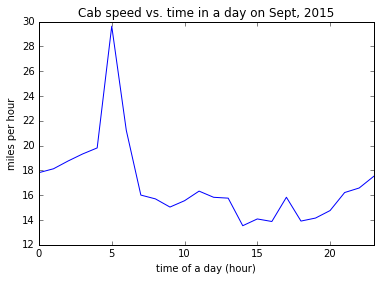

In [154]:
#plot the time/speed relationship
plt.figure()

plt.plot(np.arange(0,24), mean_hour.values.flatten())
plt.title("Cab speed vs. time in a day on Sept, 2015")
plt.xlabel('time of a day (hour)')
plt.ylabel('miles per hour')
plt.xlim(0,23)
plt.show()

Looks like cabs have very high speed right before dawn, slowest in evening rush hour and faster in non-rush hours during the day, evenings and dinner time. Obviously, cab speed is largely determined by traffics. If I have more time, I can do more detailed analysis with only weekends and holidays, and that "outlier" 29th. I guess those plots will be slightly different 

If I have more time, I will definitely make the plots nicer. I would also like to visualize all the trajectories of individual cab trips using d3.js. Also, I would like to investigate what are some key variables to predict tip ratio and why they are. 

This was fun.